In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
df = pd.read_json("data/full_text_classification.jsonl", lines=True)

labels_map = {
    0: "pozytywny wydźwięk",
    1: "neutralny wydźwięk",
    2: "negatywny wydźwięk",
    3: "mowa nienawiści"
}

df["label"] = df["label"].replace(labels_map)

In [3]:
df

,text,label
0,"@USER Nic, nic,nic nieważne, jutro albo w najb...",neutralny wydźwięk
1,@USER Kibic @USER odpowiada @USER i @USER na k...,neutralny wydźwięk
2,Mówi że stare rapsy są całkiem niezle,neutralny wydźwięk
3,"@USER @USER Zaległości były, ale ważne czy był...",neutralny wydźwięk
4,@USER @USER Oby nie spierdolil na północ,negatywny wydźwięk
...,...,...
4436,"@USER Noc? To wtedy, gdy jest ciemno? Bo żadne...",neutralny wydźwięk
4437,"wszędzie dobrze, ale w grobie najlepiej",mowa nienawiści
4438,@USER a ile zagrał tam minut ?,neutralny wydźwięk
4439,@USER #FinalSix: Mamy to !!! Puchar Polski jes...,pozytywny wydźwięk


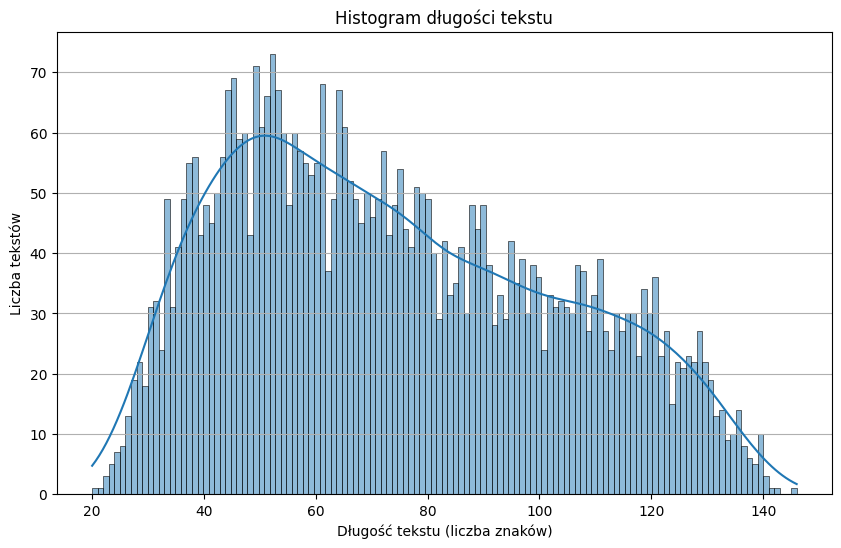

In [4]:
df['length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=max(df['length']) - min(df['length']) + 1, kde=True)

plt.title('Histogram długości tekstu')
plt.xlabel('Długość tekstu (liczba znaków)')
plt.ylabel('Liczba tekstów')
plt.grid(axis='y')

plt.show()

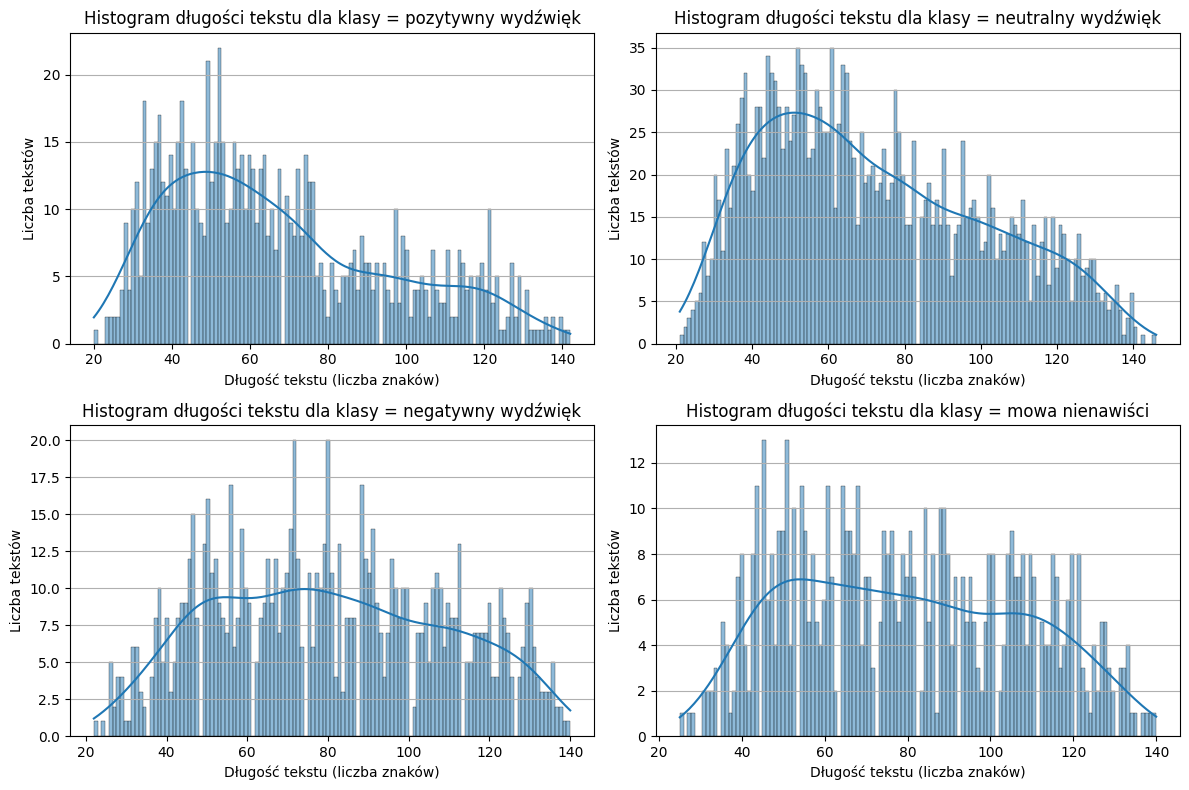

In [5]:
plt.figure(figsize=(12, 8))

labels = labels_map.values()
for i, label in enumerate(labels):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[df['label'] == label]['length'], 
                 bins=max(df['length']) - min(df['length']) + 1, 
                 kde=True)
    
    plt.title(f'Histogram długości tekstu dla klasy = {label}')
    plt.xlabel('Długość tekstu (liczba znaków)')
    plt.ylabel('Liczba tekstów')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

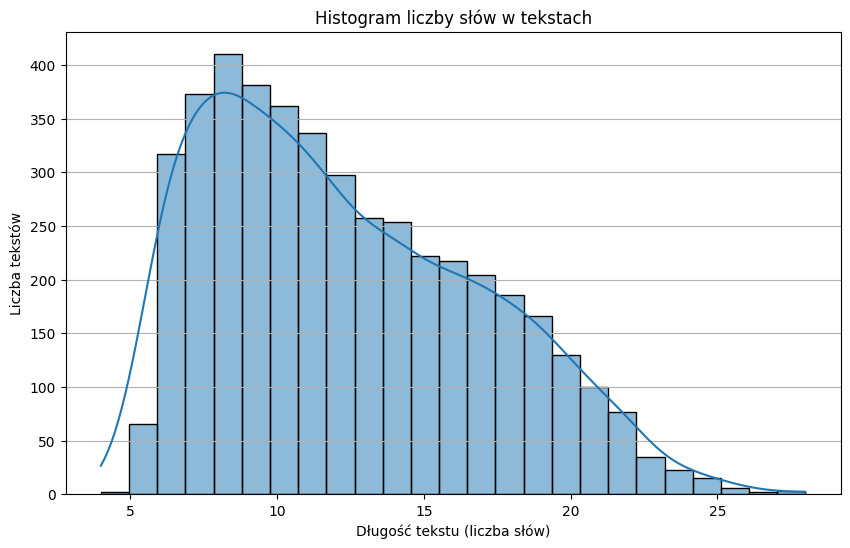

In [6]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=max(df['word_count']) - min(df['word_count']) + 1, kde=True)

plt.title('Histogram liczby słów w tekstach')
plt.xlabel('Długość tekstu (liczba słów)')
plt.ylabel('Liczba tekstów')
plt.grid(axis='y')

plt.show()

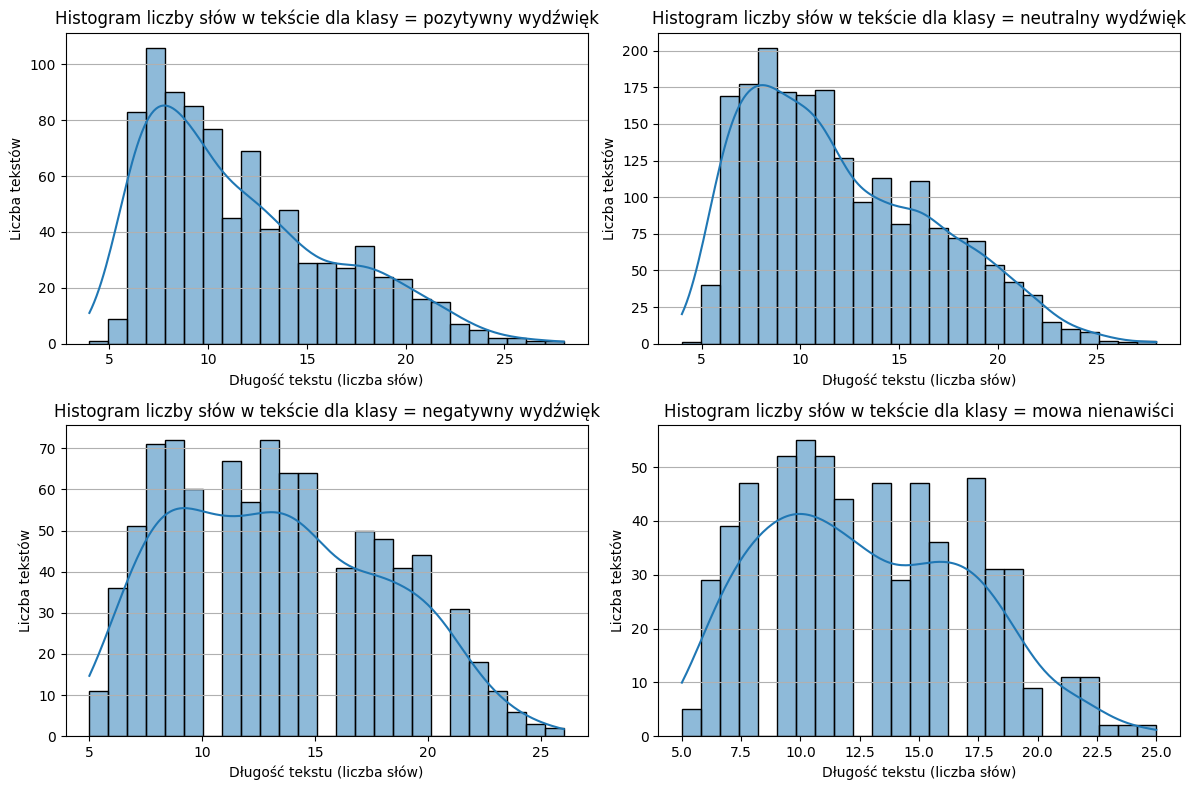

In [7]:
plt.figure(figsize=(12, 8))

for i, label in enumerate(labels):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[df['label'] == label]['word_count'], 
                 bins=max(df['word_count']) - min(df['word_count']) + 1, 
                 kde=True)
    
    plt.title(f'Histogram liczby słów w tekście dla klasy = {label}')
    plt.xlabel('Długość tekstu (liczba słów)')
    plt.ylabel('Liczba tekstów')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [8]:
label_counts = df['label'].value_counts()
fig = go.Figure(
    go.Pie(
        labels=label_counts.index,
        values=label_counts.values,
        hoverinfo="label+percent",
        textinfo="value"
    )
)
fig.update_layout(title="Rozkład klas")
fig.show()